In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Mental_fitness_tracker.csv")
df1 = pd.read_csv("Prevalence_mental_fitness.csv")

In [3]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6840 non-null   object 
 1   Code                                                                              6150 non-null   object 
 2   Year                                                                              6840 non-null   int64  
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)          6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 5   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 6   

In [6]:
df.columns

Index(['Entity', 'Code', 'Year',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'],
      dtype='object')

In [7]:
df1.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'],
      dtype='object')

In [8]:
df.axes

[RangeIndex(start=0, stop=6840, step=1),
 Index(['Entity', 'Code', 'Year',
        'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'],
       dtype='object')]

In [9]:
df1.axes

[RangeIndex(start=0, stop=6840, step=1),
 Index(['Entity', 'Code', 'Year',
        'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
        'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
        'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
        'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
        'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
        'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
        'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'],
       dtype='object')]

In [10]:
df.shape

(6840, 4)

In [11]:
df1.shape

(6840, 10)

In [12]:
df.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                                           1.791189                                                
3                                           1.776779                                                
4                                           1.712986

In [13]:
df1.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                           0.444036                                 
1                                           0.444250                                 
2                                           0.445501                                 
3                                           0.445958                                 
4                                           0.445779

In [14]:
data=pd.merge(df,df1)
data.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  \
0                                           1.696670                                                 
1                                           1.734281                                                 
2                                           1.791189                                                 
3                                           1.776779                                                 
4                                           1.712986                                                 

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                           0.444036                                 
1                                           0.444250              

In [15]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Pe

In [16]:
data.drop('Code',axis=1,inplace=True)

In [17]:
data.head()

Entity  Year  \
0  Afghanistan  1990   
1  Afghanistan  1991   
2  Afghanistan  1992   
3  Afghanistan  1993   
4  Afghanistan  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  \
0                                           1.696670                                                 
1                                           1.734281                                                 
2                                           1.791189                                                 
3                                           1.776779                                                 
4                                           1.712986                                                 

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                           0.444036                                 
1                                           0.444250                                 
2         

In [18]:
data.size,data.shape

(68400, (6840, 10))

In [19]:
data.set_axis(['Country','Year','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'],axis=1,inplace=True)

In [20]:
data.head()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       1.696670          0.228979         0.721207   
1  Afghanistan  1991       1.734281          0.228120         0.719952   
2  Afghanistan  1992       1.791189          0.227328         0.718418   
3  Afghanistan  1993       1.776779          0.226468         0.717452   
4  Afghanistan  1994       1.712986          0.225567         0.717012   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  0.131001    4.835127    0.454202  5.125291        0.444036  
1  0.126395    4.821765    0.447112  5.116306        0.444250  
2  0.121832    4.801434    0.441190  5.106558        0.445501  
3  0.117942    4.789363    0.435581  5.100328        0.445958  
4  0.114547    4.784923    0.431822  5.099424        0.445779

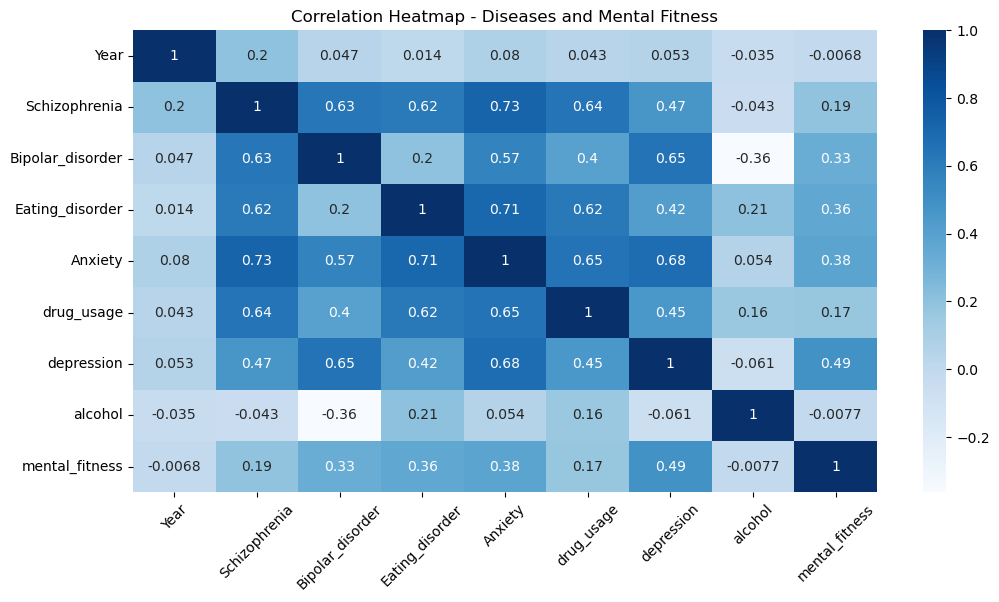

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

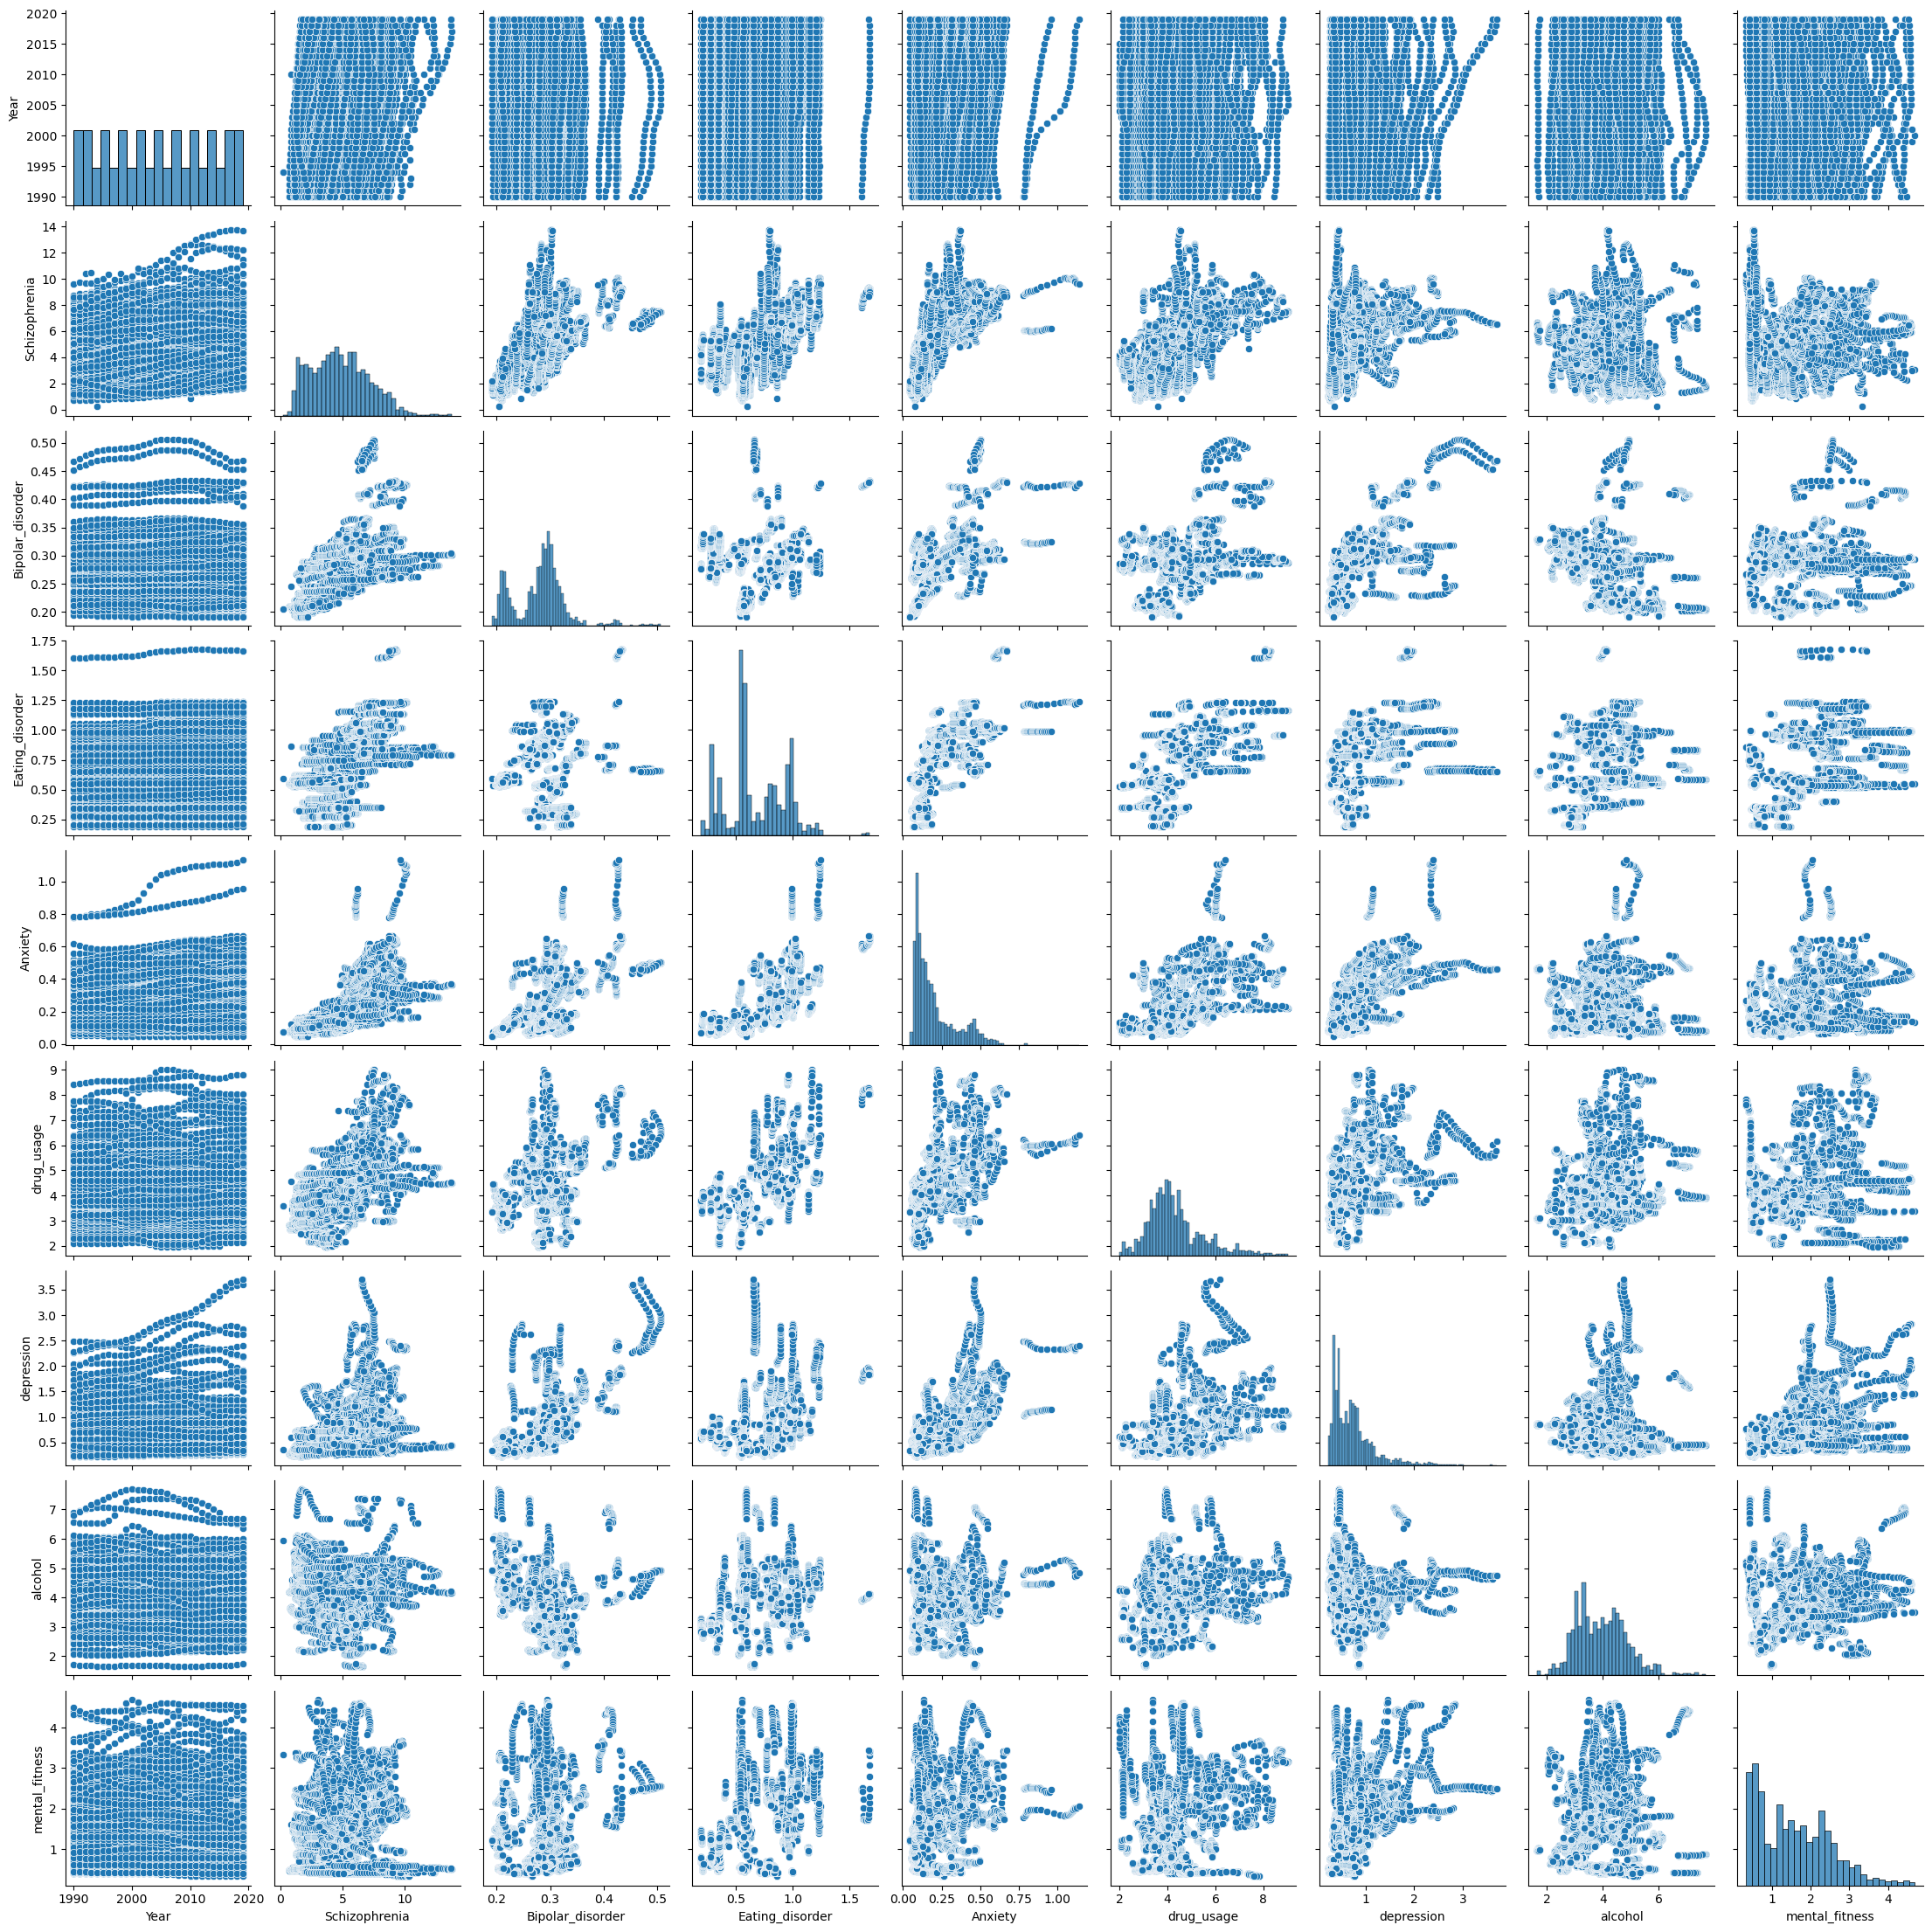

In [22]:
sns.pairplot(data)
plt.show()               #doubt

In [23]:
mean=data['mental_fitness'].mean()
mean

1.5788071625382203

In [24]:
data['mental_fitness'].value_counts()

0.444036    1
0.773502    1
0.773802    1
0.774309    1
0.775088    1
           ..
0.539960    1
0.541680    1
0.543986    1
0.543205    1
1.776729    1
Name: mental_fitness, Length: 6840, dtype: int64

In [25]:
fig=px.pie(data,values='mental_fitness',names='Year')
fig.show()                                                    

In [26]:
data.corr()

Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
Year              1.000000       0.198242          0.046543         0.013536   
Schizophrenia     0.198242       1.000000          0.627326         0.616586   
Bipolar_disorder  0.046543       0.627326          1.000000         0.200035   
Eating_disorder   0.013536       0.616586          0.200035         1.000000   
Anxiety           0.079822       0.725597          0.567001         0.712130   
drug_usage        0.043084       0.640698          0.395485         0.620014   
depression        0.053236       0.465970          0.647464         0.421331   
alcohol          -0.035427      -0.043484         -0.362826         0.206731   
mental_fitness   -0.006759       0.190990          0.327868         0.361718   

                   Anxiety  drug_usage  depression   alcohol  mental_fitness  
Year              0.079822    0.043084    0.053236 -0.035427       -0.006759  
Schizophrenia     0.725597    0.640698    0.465970 -0.043484        0.190990  
Bipolar_disorder  0.567001    0.395485    0.647464 -0.362826        0.327868  
Eating_disorder   0.712130    0.620014    0.421331  0.206731        0.361718  
Anxiety           1.000000    0.645671    0.679770  0.053520        0.379949  
drug_usage        0.645671    1.000000    0.452157  0.162404        0.170741  
depression        0.679770    0.452157    1.000000 -0.060790        0.485653  
alcohol           0.053520    0.162404   -0.060790  1.000000       -0.007679  
mental_fitness    0.379949    0.170741    0.485653 -0.007679        1.000000

<AxesSubplot:>

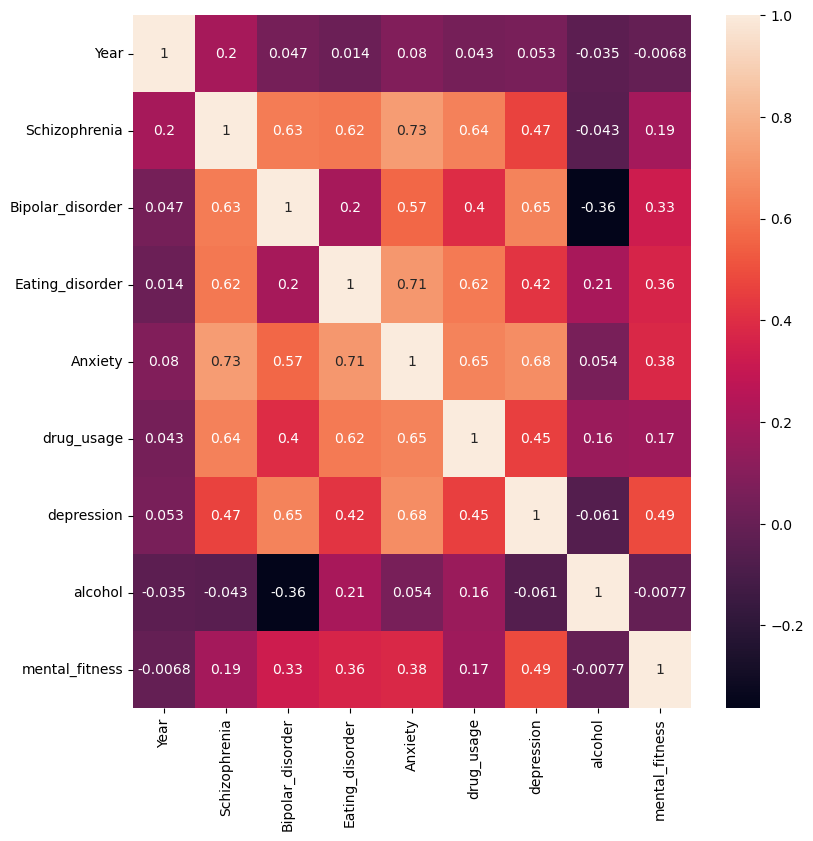

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)

In [28]:
vif = pd.DataFrame() 

In [29]:
data=data.drop('Country',axis=1)

In [30]:
vif['Variables'] = data.columns
vif 

Variables
0              Year
1     Schizophrenia
2  Bipolar_disorder
3   Eating_disorder
4           Anxiety
5        drug_usage
6        depression
7           alcohol
8    mental_fitness

In [31]:
data.head()

Year  Schizophrenia  Bipolar_disorder  Eating_disorder   Anxiety  \
0  1990       1.696670          0.228979         0.721207  0.131001   
1  1991       1.734281          0.228120         0.719952  0.126395   
2  1992       1.791189          0.227328         0.718418  0.121832   
3  1993       1.776779          0.226468         0.717452  0.117942   
4  1994       1.712986          0.225567         0.717012  0.114547   

   drug_usage  depression   alcohol  mental_fitness  
0    4.835127    0.454202  5.125291        0.444036  
1    4.821765    0.447112  5.116306        0.444250  
2    4.801434    0.441190  5.106558        0.445501  
3    4.789363    0.435581  5.100328        0.445958  
4    4.784923    0.431822  5.099424        0.445779

In [32]:
x = data.drop('mental_fitness', axis=1)
y = data['mental_fitness']

In [33]:
x

Year  Schizophrenia  Bipolar_disorder  Eating_disorder   Anxiety  \
0     1990       1.696670          0.228979         0.721207  0.131001   
1     1991       1.734281          0.228120         0.719952  0.126395   
2     1992       1.791189          0.227328         0.718418  0.121832   
3     1993       1.776779          0.226468         0.717452  0.117942   
4     1994       1.712986          0.225567         0.717012  0.114547   
...    ...            ...               ...              ...       ...   
6835  2015       2.193166          0.209359         0.560882  0.099610   
6836  2016       2.279813          0.209979         0.561768  0.100821   
6837  2017       2.364265          0.210631         0.562612  0.101671   
6838  2018       2.472949          0.211237         0.563283  0.102398   
6839  2019       2.525892          0.211969         0.563820  0.102902   

      drug_usage  depression   alcohol  
0       4.835127    0.454202  5.125291  
1       4.821765    0.447112  5.116306  
2       4.801434    0.441190  5.106558  
3       4.789363    0.435581  5.100328  
4       4.784923    0.431822  5.099424  
...          ...         ...       ...  
6835    3.315701    0.599604  3.548613  
6836    3.324230    0.603658  3.557508  
6837    3.330569    0.608096  3.564138  
6838    3.317500    0.609065  3.563141  
6839    3.283934    0.610644  3.554571  

[6840 rows x 8 columns]

In [34]:
y

0       0.444036
1       0.444250
2       0.445501
3       0.445958
4       0.445779
          ...   
6835    1.734969
6836    1.689281
6837    1.651805
6838    1.686711
6839    1.776729
Name: mental_fitness, Length: 6840, dtype: float64

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [36]:
x_test

Year  Schizophrenia  Bipolar_disorder  Eating_disorder   Anxiety  \
1924  1994       1.278865          0.208015         0.620157  0.064395   
3957  2017       3.156147          0.229399         0.571464  0.164019   
2338  2018       7.059871          0.408825         0.709331  0.543483   
147   2017       4.405709          0.321973         0.294503  0.135229   
5579  2019       4.720232          0.293246         0.358869  0.127242   
...    ...            ...               ...              ...       ...   
6430  2000       3.312528          0.275510         0.533425  0.091866   
5939  2019       5.236180          0.316376         0.346550  0.139101   
273   1993       3.829403          0.291226         0.570993  0.101915   
6587  2007       5.200890          0.322849         0.273374  0.123913   
3464  2004       5.457650          0.311411         0.353253  0.111805   

      drug_usage  depression   alcohol  
1924    3.617207    0.345852  5.056581  
3957    3.651701    0.720892  3.709884  
2338    5.303012    1.839851  6.521377  
147     4.228379    0.755551  2.767196  
5579    3.206625    0.509808  3.580946  
...          ...         ...       ...  
6430    2.120082    0.433652  3.400741  
5939    3.572661    0.853444  2.991857  
273     3.289106    0.499087  2.945949  
6587    3.451545    0.694037  2.894254  
3464    3.784172    0.521438  3.373242  

[1368 rows x 8 columns]

In [37]:
x_train

Year  Schizophrenia  Bipolar_disorder  Eating_disorder   Anxiety  \
5418  2008       1.630440          0.191915         0.589551  0.045606   
4879  2009       3.238559          0.299341         0.551432  0.154566   
605   1995       1.366814          0.213561         0.550517  0.090107   
5866  2006       3.559209          0.273002         0.539803  0.078368   
5327  2007       4.716384          0.312005         0.581282  0.167100   
...    ...            ...               ...              ...       ...   
905   1995       1.079369          0.203841         0.584931  0.077042   
5192  1992       4.252551          0.299469         0.571391  0.131668   
3980  2010       2.836302          0.285726         0.272603  0.090634   
235   2015       6.741364          0.300819         0.989655  0.277992   
5157  2017       5.946725          0.244355         0.987388  0.434011   

      drug_usage  depression   alcohol  
5418    3.366067    0.337348  4.909171  
4879    3.369208    1.386746  3.286060  
605     3.182445    0.298467  4.390414  
5866    2.476941    0.429241  2.944312  
5327    3.710683    0.790574  2.988647  
...          ...         ...       ...  
905     3.599235    0.338090  5.549156  
5192    3.493616    0.456680  3.260254  
3980    4.149825    0.724486  3.262589  
235     4.544870    0.832587  3.049130  
5157    4.534320    2.632554  4.279647  

[5472 rows x 8 columns]

In [38]:
y_train

5418    1.201792
4879    3.419001
605     0.539408
5866    2.587206
5327    2.218059
          ...   
905     1.579083
5192    2.215395
3980    0.773247
235     2.169640
5157    4.468214
Name: mental_fitness, Length: 5472, dtype: float64

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
model_performance = {}

forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)
forest_y_pred = forest_model.predict(x_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

In [42]:
model_performance = {'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test}}

In [43]:
regression_scores = {"Random Forest Regression": (forest_mse, forest_r2)}
print(regression_scores)

{'Random Forest Regression': (0.004771883181565857, 0.9946336445519575)}


In [44]:
model.coef_

array([ 4.35911128e-03, -1.42884273e-01,  6.70935374e+00,  1.71079860e+00,
        1.35475039e-02, -1.49483462e-01,  6.42032582e-01,  5.72236368e-02])

In [45]:
model.intercept_

-9.574969305076309

In [46]:
y_pred_train = model.predict(x_train)

mse= mean_squared_error(y_train, y_pred_train )
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(y_train,y_pred_train )
print('R2:',r2)

mae= mean_absolute_error(y_train, y_pred_train )
print('MAE:', mae)

MSE: 0.5751889426050595
RMSE: 0.7584121192366716
R2: 0.33842691045978923
MAE: 0.6016168230934783


In [47]:
y_test[:10]

1924    2.287695
3957    2.083220
2338    3.894985
147     0.662765
5579    1.059430
2983    0.758668
4557    1.542167
2256    0.517066
1578    1.976070
3777    2.396879
Name: mental_fitness, dtype: float64

In [48]:
y_pred[:10]

array([1.36254561, 1.41465888, 2.93852024, 1.26511766, 1.18768954,
       1.33067256, 1.87248036, 1.26403735, 2.30509232, 2.31002326])